### Задача

Определеить режимы стрельбы из 23 мм нарезной бикалиберной пушки полиэтиленом для того, чтобы что-то доказать)) (где он застревает, а где рвется после конуса.

Параметры пушки:
- $d$ = 23 мм;
- $W_{каморы}$ = 42 см$^3$;
- $L_{ствола}$ = 887 мм;
- конусы: 23-16-100-100, 23-18-100-100, 23-14-80-120;
- порох 4\\7.

In [1]:
import os
wd = os.getcwd()
wd = os.path.dirname(os.path.dirname(wd))
import sys
sys.path.append(wd+"\\src\\")

In [2]:
from tube import InterpXY,Tube,BorderSimple
from math import *
import numpy as np
from powderlayer import PowderBD, PowderOvLayer, Powder
from pistonlayer import ElPistEOS, ElPistLayer
import pprint as pp

In [3]:
from tqdm import tqdm_notebook
from matplotlib.patches import Polygon
import matplotlib as mpl
import matplotlib.pyplot as plt

from ipywidgets import interact, interactive, fixed
import ipywidgets

%matplotlib inline 
%config InlineBackend.figure_format = 'svg' 

mpl.rcParams['figure.figsize'] = (5,3) 

In [4]:
import json
# from functional import seq

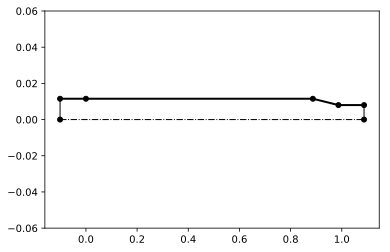

In [5]:
tube2316=Tube.get_standart({
    'tube_points': [[0, 0.023], [0.887, 0.023], [0.987, 0.016], [1.087, 0.016]]
})
W_0 = 42 * 1e-6
x_left = -tube2316.get_x2(0, W_0)
tube2316=Tube.get_standart({
    'tube_points': [[x_left, 0.023],[0, 0.023], [0.887, 0.023], [0.987, 0.016], [1.087, 0.016]]
})

tube = tube2316
ax, fig = plt.subplots()
tube2316.plot(ax, fig)
fig.set_ylim(-0.06,0.06)
plt.show()

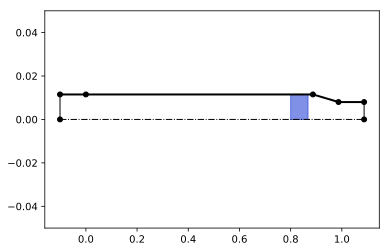

ElPistLayer(n_cells=300); 
        {'p_max':100000.0, 'tau_min': 9.425696139142217e-08, 
        'u_max': 100.0, 'cs_max': 2308.0384458555504, 'dx_min': 0.00022697438682006688, 
        'x_1': 0.8, 'x_2': 0.8680923160460452,
        'V_1':  0.0, 'V_2':  0.0  }

In [6]:
v0 = 100
pist_layer_dict_sample = {
    'type': 'pist',
    'omega': 0.026,  # кг
    'p_0': 1e5, # начальное давление в полиэтилене
    'u_0': v0,     #начальная скорость
    'ElPistEOS_kwargs': dict(
        k=1.63098, 
        c_0=2308, 
        ro_0=919.03, 
        sigma_star=25.2, 
        k_0=0.054, 
        b_1=0.027, 
        b_2=0.00675, 
        tau_0=1.36, 
        mu=0.001, 
        tau_s=1,                 
        zeroP=False, 
        zeroE=True)
}


calc_settings_sample2 = {
    'cell_dx': 0.0001,
#     'n_cells': 600,
    'n_cells_min': 13,
    'n_cells_max': 300,
    'GasFluxCalculator_kwargs': {'flux_type':1, 'x_order':1, 'alpha_1':1, 'alpha_2':0.5},
    'GridStrecher_kwargs': {}
}   
pistl = ElPistLayer.get_standart(tube2316, 0.8, pist_layer_dict_sample, calc_settings_sample2)   


fig, ax = plt.subplots()
pistl.plot(fig, ax,plot_tube=True)
ax.set_ylim(-0.05,0.05)
plt.show()

pistl

In [7]:
pistl.flux_calculator.get_Vs_border_svobodn(pistl, 1e5,1e5)

(100.0, 100.0)

In [8]:
# lrs = [pistl]
# vl,vr = pistl.flux_calculator.get_Vs_border_svobodn(pistl, 1e5,1e5)
# x1, x2 = 0.1, 0.2
# for i in range(20000):
#     tau = pistl.get_tau_min()*0.4
#     x = pistl.xs_borders[0]
#     mnj = (x - x1) / (x2 - x1)
#     vl,vr = pistl.flux_calculator.get_Vs_border_svobodn(pistl, 1e5,1e5)
#     pistl = pistl.step_simple(tau, vl, vr)
#     lrs.append(pistl)
#     if pistl.time > 0.005:
#         break
# len(lrs)

In [9]:
# @interact(ind=ipywidgets.IntSlider(min=0,max=len(lrs)-1,step=100, value=0))
# def plotMe(ind):
#     param_name = 'us'
#     lr = lrs[ind]
#     fig, ax = plt.subplots()
#     xs = np.array(lr.xs_cells)
#     ys = np.array(getattr(lr, param_name))
#     color = lr.color_4_plot
#     lw = 2
#     ax.plot(xs, ys, color=color, lw=lw, label=param_name)
# #     ys = np.array(getattr(lr, 'us'))
# #     ax.plot(xs, ys, lw=lw, label='us')
# #     ys = np.array(getattr(lr, 'ps'))/1e4
# #     ax.plot(xs, ys, lw=lw, label='ps')
# #     ys = np.array(getattr(lr, 'es'))
# #     ax.plot(xs, ys, lw=lw, label='es')
#     plt.grid(True)
#     plt.ylabel(param_name)
#     plt.xlim(0.8,1.3)
# #     plt.ylim(-30,200)
#     plt.title(f't={lr.time*1000} ms; i={ind}')
#     plt.legend()
#     plt.show()

In [10]:
def get_powder_layer(omega, tube):
    powder_layer_dict_sample = {
        'type': 'powder',
        'powder': PowderBD()['4\\7'],
        'omega': omega,  # грамм
        'delta': omega/W_0*1e-3, # кг/m^3
        'p_0': 5e6, # начальное давление
        't_ign': 0,#0.000001, # начало горения
        'u_0': 0,     #начальная скорость
    }

    calc_settings_sample = {
        'cell_dx': 0.001,
        'n_cells_min': 13,
        'n_cells_max': 300,
        'GasFluxCalculator_kwargs': {'flux_type':1},
        'GridStrecher_kwargs': {}
    }  
    pl = PowderOvLayer.get_standart(tube, tube.get_xs()[0], powder_layer_dict_sample, calc_settings_sample)
    return pl

def get_piston_layer(omega, tube, x_left=0):
    pist_layer_dict_sample = {
    'type': 'pist',
    'omega': omega/1000,  # кг
    'p_0': 1e5, # начальное давление в полиэтилене
    'u_0': 0,     #начальная скорость
    'ElPistEOS_kwargs': dict(
        k=1.63098, 
        c_0=2308, 
        ro_0=919.03, 
        sigma_star=25.2, 
        k_0=0.054, 
        b_1=0.027, 
        b_2=0.00675, 
        tau_0=1.36, 
        mu=0.001, 
        tau_s=1,                 
        zeroP=False, 
        zeroE=True)
    }
    calc_settings_sample2 = {
        'cell_dx': 0.0005,
    #     'n_cells': 600,
        'n_cells_min': 13,
        'n_cells_max': 300,
        'GasFluxCalculator_kwargs': {'flux_type':1, 'x_order':1, 'alpha_1':1, 'alpha_2':0.5},
        'GridStrecher_kwargs': {}
    }   
    pistl = ElPistLayer.get_standart(tube, x_left, pist_layer_dict_sample, calc_settings_sample2)   
    return pistl

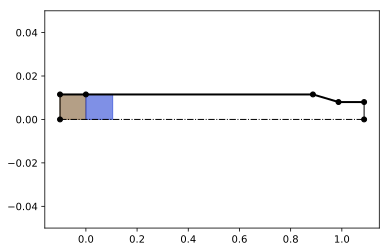

ElPistLayer(n_cells=210); 
        {'p_max':100000.0, 'tau_min': 2.1613366410472254e-07, 
        'u_max': 0.0, 'cs_max': 2308.0384458555504, 'dx_min': 0.0004988448061973294, 
        'x_1': 0.0, 'x_2': 0.10475740930144184,
        'V_1':  0.0, 'V_2':  0.0  }

In [11]:
pl = get_powder_layer(33, tube)
pistl = get_piston_layer(40, tube)

fig, ax = plt.subplots()
tube.plot(fig, ax)
pl.plot(fig, ax)
pistl.plot(fig, ax)
ax.set_ylim(-0.05,0.05)
plt.show()
pistl

In [12]:
def get_solutions(omega, pistonomega, m_op, p_f, tube, courant=0.3):
    border_dict_sample = {
        'mass': m_op/1000, # kg
        'p_f': p_f, #Pa
        't_init': -1,
        'w_border': 0.005, #m
    }
    plr = get_powder_layer(omega, tube)
    pistlr = get_piston_layer(pistonomega, tube, x_left=border_dict_sample['w_border'])
    
    border = BorderSimple.get_standart(border_dict_sample)
    border.lr_left = plr
    border.lr_right = pistlr
    res =[{ 
        't': 0,
        'plr': plr, 
        'pistlr': pistlr,
        'border': border 
        }]
    razriv = False
    for i in tqdm_notebook(range(200000)):
        if res[-1]['t'] > 0.1:
            print('timebreak')
            break
        if res[-1]['pistlr'].xs_borders[-1] > tube.get_xs()[-1] + 0.3:
            print('poof')
            break
        ps = np.array(res[-1]['pistlr'].ps)
        razriv = np.any(ps<-13e6)
            
        tau = min([lr.get_tau_min() for lr in [res[-1]['plr'], res[-1]['pistlr']]])*courant
        res[-1]['border'].update_xs()
        res[-1]['border'].update_Vs(tau)
        vl,vr = res[-1]['pistlr'].flux_calculator.get_Vs_border_svobodn(res[-1]['pistlr'], 1e5,1e5)
        res[-1]['pistlr'].Vs_borders[-1] = vr
        new_res = { 
            't': res[-1]['t']+tau,
            'plr': res[-1]['plr'].step_up(tau,False), 
            'pistlr': res[-1]['pistlr'].step_up(tau,False),
            'border': border.copy() 
        }
        if i%100==0:
            res.append(new_res)
        else:
            res[-1] = new_res
        
        res[-1]['border'].lr_left = res[-1]['plr']
        res[-1]['border'].lr_right = res[-1]['pistlr']
    if razriv:
        print('Произошел разрыв')
        
    return res
        

In [13]:
res1 = get_solutions(42, 73, 2, 50e6, tube, courant=0.4)

poof


In [14]:
@interact(ind=ipywidgets.IntSlider(min=0,max=len(res1)-1,step=1, value=0))
def plotMe(ind):
    
    res = res1[ind]
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, sharex=True, figsize=(10,7), gridspec_kw={'height_ratios':[2, 2, 1]})
    tube.plot(fig, ax2)
    ax2.set_ylim(-0.005, 0.02)
    lr = res['plr']
    lr.plot(fig, ax2)
    lr = res['pistlr']
    lr.plot(fig, ax2)
    
    param_name = 'us'
    lr = res['plr']
    xs = np.array(lr.xs_cells)
    ys = np.array(getattr(lr, param_name))
    color = lr.color_4_plot
    lw = 2
    ax0.plot(xs, ys, color=color, lw=lw, label=f'{param_name} порох')
    
    lr = res['pistlr']
    xs = np.array(lr.xs_cells)
    ys = np.array(getattr(lr, param_name))
    color = lr.color_4_plot
    lw = 2
    ax0.plot(xs, ys, color=color, lw=lw, label=f'{param_name} поршень')
    
    ax0.grid(True)
    ax0.set_ylabel(param_name)
#     ax0.set_ylim(900,1000)
    ax0.set_title(f't={lr.time*1000} ms; i={ind}')
    ax0.legend()
    
    param_name = 'ps'
    lr = res['plr']
    xs = np.array(lr.xs_cells)
    ys = np.array(getattr(lr, param_name))
    color = lr.color_4_plot
    lw = 2
    ax1.plot(xs, ys/1e5, color=color, lw=lw, label=f'{param_name} порох')
    
    lr = res['pistlr']
    xs = np.array(lr.xs_cells)
    ys = np.array(getattr(lr, param_name))
    color = lr.color_4_plot
    lw = 2
    ax1.plot(xs, ys/1e5, color=color, lw=lw, label=f'{param_name} поршень')
    
    ax1.grid(True)
    ax1.set_ylabel(f'$p$, атм.')
#     ax1.set_ylim(-500,700)
#     ax1.set_title(f't={lr.time*1000} ms; i={ind}')
    ax1.legend()
    plt.show()

interactive(children=(IntSlider(value=0, description='ind', max=192), Output()), _dom_classes=('widget-interac…

### Орево 07 06

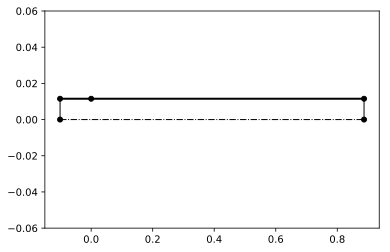

In [13]:
tube=Tube.get_standart({
    'tube_points': [[0, 0.023], [0.887, 0.023]]
})
W_0 = 42 * 1e-6
x_left = -tube.get_x2(0, W_0)
tube=Tube.get_standart({
    'tube_points': [[x_left,0.023],[0, 0.023], [0.887, 0.023]]
})
ax, fig = plt.subplots()
tube.plot(ax, fig)
fig.set_ylim(-0.06,0.06)
plt.show()

In [14]:
def get_powder_layer(omega, tube):
    powder_layer_dict_sample = {
        'type': 'powder',
        'powder': PowderBD()['СФ 033'],
        'omega': omega,  # грамм
        'delta': omega/W_0*1e-3, # кг/m^3
        'p_0': 5e6, # начальное давление
        't_ign': 0,#0.000001, # начало горения
        'u_0': 0,     #начальная скорость
    }

    calc_settings_sample = {
        'cell_dx': 0.00025,
        'n_cells_min': 13,
        'n_cells_max': 300,
        'GasFluxCalculator_kwargs': {'flux_type':2},
        'GridStrecher_kwargs': {}
    }  
    pl = PowderOvLayer.get_standart(tube, x_left, powder_layer_dict_sample, calc_settings_sample)
    return pl

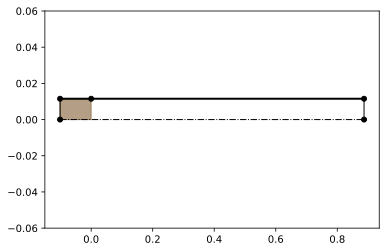

In [15]:
pl = get_powder_layer(50, tube)
ax, fig = plt.subplots()
pl.plot(ax, fig, plot_tube=True)
fig.set_ylim(-0.06,0.06)
plt.show()

In [16]:
border = BorderSimple(pl, None, 0.051, 40e6)

In [31]:
def get_solutions(omega, q, p_f,courant=0.3):
    border_dict_sample = {
        'mass': q/1000, # kg
        'p_f': p_f, #Pa
        't_init': -1,
        'w_border': 0, #m
    }
    plr = get_powder_layer(omega, tube)
    border = BorderSimple.get_standart(border_dict_sample)
    border.lr_left = plr
    res =[{ 
        't': 0,
        'plr': plr, 
        'border': border 
        }]
    for i in range(100000):
        if res[-1]['t'] > 0.1:
            print('timebreak')
            break
        if res[-1]['plr'].xs_borders[-1] > tube.get_xs()[-1]:
#             print('poof')
            break

            
        tau = res[-1]['plr'].get_tau_min() *courant
        res[-1]['border'].update_xs()
        res[-1]['border'].update_Vs(tau)
        
        new_res = { 
            't': res[-1]['t']+tau,
            'plr': res[-1]['plr'].step_up(tau,False), 
            'border': border.copy() 
        }
        if i%100==0:
            res.append(new_res)
        else:
            res[-1] = new_res
        
        res[-1]['border'].lr_left = res[-1]['plr']
        
    return res
        

In [33]:
pfs = np.linspace(20,80, 21)*1e6
def get_pv(pf):
    res1 = get_solutions(25, 51, pf,courant=0.3)
    pmax = max([np.max(d['plr'].ps) for d in res1])
    v_d = res1[-1]['plr'].Vs_borders[-1]
    return (pmax/1e5, v_d)
ps = np.zeros_like(omegas)
vs = np.zeros_like(omegas)
for i, pf in enumerate(tqdm_notebook(pfs)):
    ps[i],vs[i] = get_pv(pf)
    

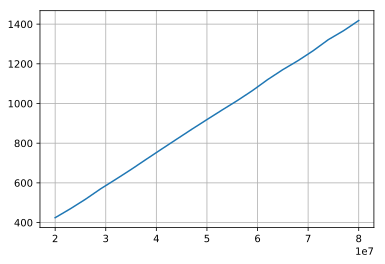

In [36]:
plt.plot(pfs, ps)
plt.grid()
plt.show()

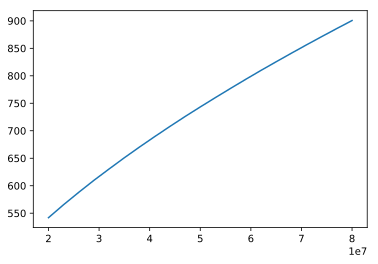

In [37]:
plt.plot(pfs, vs)
plt.show()

In [42]:
res1 = get_solutions(25, 51, 60e6,courant=0.3)
pmax = max([np.max(d['plr'].ps) for d in res1])
v_d = res1[-1]['plr'].Vs_borders[-1]
print(f'pmax = {pmax*1e-5:.0f} атм, v_d = {v_d}')

pmax = 1083 атм, v_d = 799.1731183747656


In [43]:
@interact(ind=ipywidgets.IntSlider(min=0,max=len(res1)-1,step=1, value=0))
def plotMe(ind):
    
    res = res1[ind]
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, sharex=True, figsize=(10,7), gridspec_kw={'height_ratios':[2, 2, 1]})
    tube.plot(fig, ax2)
    ax2.set_ylim(-0.005, 0.02)
    lr = res['plr']
    lr.plot(fig, ax2)
    
    param_name = 'us'
    lr = res['plr']
    xs = np.array(lr.xs_cells)
    ys = np.array(getattr(lr, param_name))
    color = lr.color_4_plot
    lw = 2
    ax0.plot(xs, ys, color=color, lw=lw, label=f'{param_name} порох')
    
    
    ax0.grid(True)
    ax0.set_ylabel(param_name)
#     ax0.set_ylim(900,1000)
    ax0.set_title(f't={lr.time*1000} ms; i={ind}')
    ax0.legend()
    
    param_name = 'ps'
    lr = res['plr']
    xs = np.array(lr.xs_cells)
    ys = np.array(getattr(lr, param_name))
    color = lr.color_4_plot
    lw = 2
    ax1.plot(xs, ys/1e5, color=color, lw=lw, label=f'{param_name} порох')
    
    ax1.grid(True)
    ax1.set_ylabel(f'$p$, атм.')
#     ax1.set_ylim(-500,700)
#     ax1.set_title(f't={lr.time*1000} ms; i={ind}')
    ax1.legend()
    plt.show()

interactive(children=(IntSlider(value=0, description='ind', max=96), Output()), _dom_classes=('widget-interact…

In [20]:
bp['СФ 033']

{'name': 'СФ 033',
 'f': 1.047,
 'etta': 0.236,
 'alpha_k': 1.039,
 'T_1': 3000.0,
 'ro': 1.6,
 'I_k': 0.17,
 'Z_k': 1.331,
 'k_1': 0.309,
 'lambda_1': 1.7,
 'k_2': 0.743,
 'lambda_2': -0.996,
 'k_f': 0.0003,
 'k_l': 0.0016}